## Part 1

In [1]:
#import necessary libraries

import numpy as np
from pandas import read_csv
from pandas import DataFrame
import copy
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE
import umap

C:\Users\aczer\AppData\Local\Programs\Python\Python39\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\aczer\AppData\Local\Programs\Python\Python39\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\aczer\AppData\Local\Programs\Python\Python39\

In [2]:
#loading training and test data from files

train_in = np.array(read_csv('train_in.csv'))
train_out = np.array(read_csv('train_out.csv'))[:, 0]
test_in = np.array(read_csv('test_in.csv'))
test_out = np.array(read_csv('test_out.csv'))[:, 0]

#print(train_in.shape)
#print(train_out.shape)

In [3]:
#calculating C_d and c_d

C_d = np.empty(shape = 10, dtype = object)
c_d = np.zeros((10, 256))

for idx1 in range(len(C_d)):
    #print(train_in[train_out == idx1].shape)
    C_d[idx1] = train_in[train_out == idx1]
    #print(C_d[idx1].shape)
    c_d[idx1] = np.mean(C_d[idx1], axis = 0)
    #print(c_d[idx1])

C:\Users\aczer\AppData\Local\Temp\ipykernel_7084\436384814.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


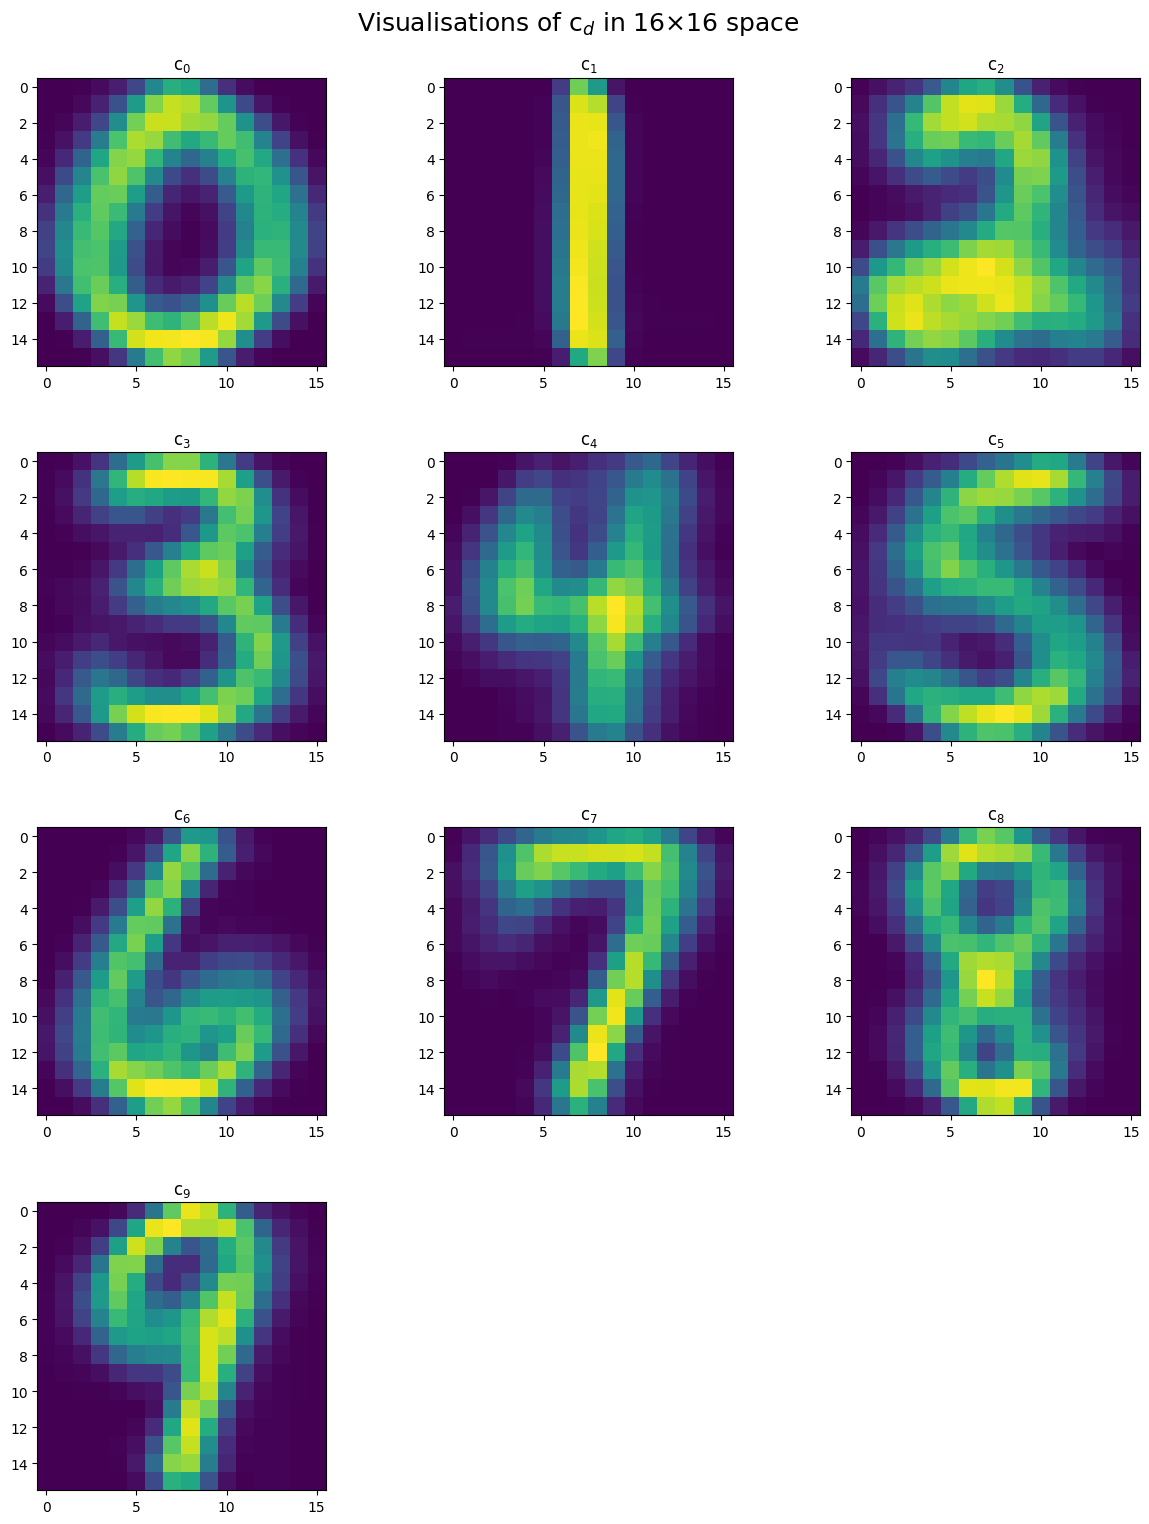

In [4]:
#visualising the c_d over 16×16 space

fig1, ax1 = plt.subplots(4, 3, figsize = (12, 16))
fig1.tight_layout(rect=[0, 0.03, 1, 0.95])

for idx2 in range(10):
    currIdx1 = int((idx2 - idx2%3)/3)
    currIdx2 = idx2%3
    #print(str(currIdx1) + ', ' + str(currIdx2))
    ax1[currIdx1, currIdx2].imshow(c_d[idx2].reshape((16, 16)))
    ax1[currIdx1, currIdx2].set_title('c$_' + str(idx2) + '$')

fig1.delaxes(ax1[3, 1])
fig1.delaxes(ax1[3, 2])

fig1.subplots_adjust(hspace=0.3, wspace=0.3)
fig1.suptitle('Visualisations of c$_d$ in 16×16 space', size = 18)
fig1.show()

In [5]:
#calculating the distance matrix

dist_ij = np.zeros((10, 10))

for idx3 in range(10):
    for idx4 in range(10):
        dist_ij[idx3, idx4] = np.linalg.norm(c_d[idx3]-c_d[idx4])

print('The distance matrix is -\n')
np.set_printoptions(threshold=np.inf, linewidth=np.inf)
print(dist_ij)
np.set_printoptions(edgeitems=3, infstr='inf', linewidth=75, 
                    nanstr='nan', precision=8, suppress=False, threshold=1000, formatter=None)

The distance matrix is -

[[ 0.         14.44960797  9.33455587  9.14373367 10.76984444  7.51929626  8.16301949 11.86455505  9.90790174 11.48887494]
 [14.44960797  0.         10.12532258 11.7332329  10.17378643 11.11880041 10.59793273 10.74315367 10.08677677  9.9320937 ]
 [ 9.33455587 10.12532258  0.          8.17828489  7.93254148  7.90679632  7.31795234  8.87253107  7.07751618  8.88774785]
 [ 9.14373367 11.7332329   8.17828489  0.          9.0876078   6.11875002  9.29242591  8.92240093  7.02042489  8.35435012]
 [10.76984444 10.17378643  7.93254148  9.0876078   0.          8.00151741  8.76599667  7.58301228  7.38090899  6.01040793]
 [ 7.51929626 11.11880041  7.90679632  6.11875002  8.00151741  0.          6.68862915  9.21195402  6.96738648  8.25853807]
 [ 8.16301949 10.59793273  7.31795234  9.29242591  8.76599667  6.68862915  0.         10.8681573   8.57020763 10.41974352]
 [11.86455505 10.74315367  8.87253107  8.92240093  7.58301228  9.21195402 10.8681573   0.          8.4677853   5.

In [6]:
#finding the most hard to seperate digit for each individual digit and most hard to seperate pairs overall

for idx5 in range(10):
    print('For ' + str(idx5) + ' the closest digit is ' + 
          str(np.argsort(dist_ij[idx5])[1]) + ' with a distance of ' + str(np.sort(dist_ij[idx5])[1]))

fDigidx, sDigidx = np.unravel_index(np.argsort(dist_ij, axis=None), dist_ij.shape)

print('The closest digit pair is (' + 
      str(fDigidx[10]) + ', ' + str(sDigidx[10]) + ') with a distance of ' + str(dist_ij[fDigidx[10], sDigidx[10]]))
print('The second closest digit pair is (' + 
      str(fDigidx[12]) + ', ' + str(sDigidx[12]) + ') with a distance of ' + str(dist_ij[fDigidx[12], sDigidx[12]]))
print('The third closest digit pair is (' + 
      str(fDigidx[14]) + ', ' + str(sDigidx[14]) + ') with a distance of ' + str(dist_ij[fDigidx[14], sDigidx[14]]))

For 0 the closest digit is 5 with a distance of 7.519296259597183
For 1 the closest digit is 9 with a distance of 9.932093699343712
For 2 the closest digit is 8 with a distance of 7.077516177863561
For 3 the closest digit is 5 with a distance of 6.118750020921418
For 4 the closest digit is 9 with a distance of 6.0104079308959975
For 5 the closest digit is 3 with a distance of 6.118750020921418
For 6 the closest digit is 5 with a distance of 6.68862915054493
For 7 the closest digit is 9 with a distance of 5.426474119055888
For 8 the closest digit is 9 with a distance of 6.40116586858544
For 9 the closest digit is 7 with a distance of 5.426474119055888
The closest digit pair is (9, 7) with a distance of 5.426474119055888
The second closest digit pair is (4, 9) with a distance of 6.0104079308959975
The third closest digit pair is (3, 5) with a distance of 6.118750020921418


## Part 2 - Visualisation using dimensionality reduction algorithms

### PCA

In [7]:
pca = PCA(n_components = 2, random_state = 42)

In [8]:
pca_out = pca.fit_transform(train_in)

In [9]:
tmp = DataFrame(pca_out)
tmp['label'] = train_out
list = []
for i in range(0,10):
    list.append(tmp.loc[tmp['label']== i])

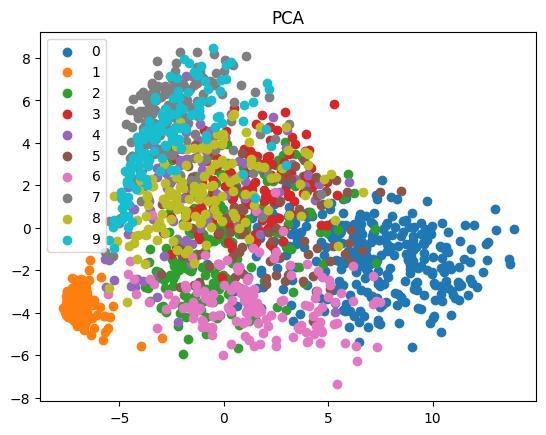

In [10]:
sc = []
for i in range(0,10):
    sc.append(plt.scatter(list[i][0],list[i][1],label= i))
plt.legend(sc,range(0,10))
plt.title('PCA')
plt.show()

### U-Map

In [20]:
map = umap.UMAP(random_state = 42)
tmp_umap = map.fit_transform(train_in)

In [21]:
tmp_umap = DataFrame(tmp_umap)
tmp_umap['label'] = train_out
list = []
for i in range(0,10):
    list.append(tmp_umap.loc[tmp_umap['label']== i])

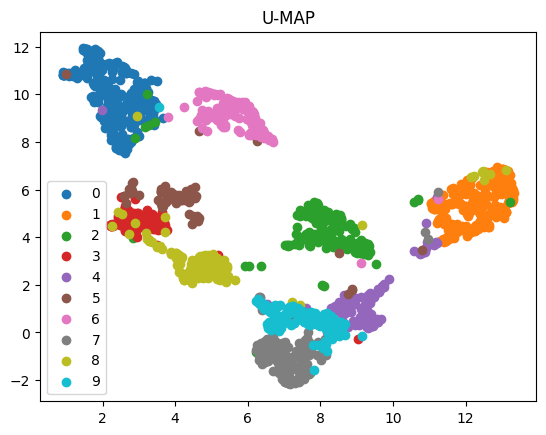

In [22]:
sc = []
for i in range(0,10):
    sc.append(plt.scatter(list[i][0],list[i][1],label= i))
plt.legend(sc,range(0,10))
plt.title('U-MAP')
plt.show()

#### TSNE

In [23]:
tsne = TSNE(random_state = 42)

In [24]:
tmp_tsne = tsne.fit_transform(train_in)
# transform = map.transform(train_in.to_numpy())
tmp_tsne = DataFrame(tmp_tsne)
tmp_tsne['label'] = train_out
list = []
for i in range(0,10):
    list.append(tmp_tsne.loc[tmp_tsne['label']== i])

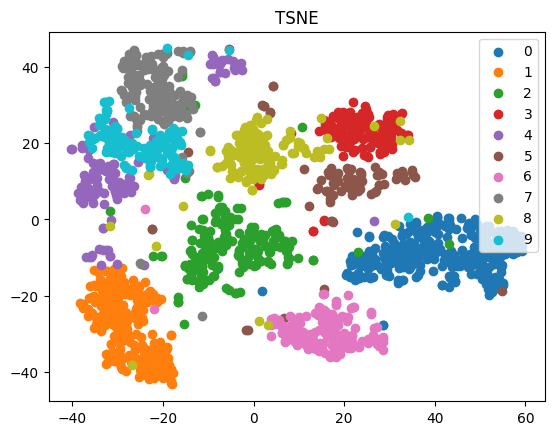

In [25]:
sc = []
for i in range(0,10):
    sc.append(plt.scatter(list[i][0],list[i][1],label= i))
plt.legend(sc,range(0,10))
plt.title('TSNE')
plt.show()

## Part 3 - Nearest mean classfier

In [11]:
#Defining the function for the Nearest mean classifier

def NMC(inputarr, means):
    assert (inputarr.ndim == 1 and ((means.ndim == 1 and len(inputarr) == len(means)) or (len(inputarr) == means.shape[1])) or 
            inputarr.shape[1] == means.shape[1]), 'Dimensionality of given points and the centres don\'t match'
    
    if inputarr.ndim == 1:
        print()
    else:
        labelarr = np.zeros(shape = len(inputarr), dtype = int)
        for idx6 in range(len(inputarr)):
            #print(point.shape)
            labelarr[idx6] = np.argmin(np.linalg.norm(means - inputarr[idx6], axis = 1))
        return labelarr

In [22]:
#calculating Nearest mean classifier accuracy for train data

NMCTrainlabels = NMC(train_in, c_d)
NMCTrainaccuracy = 100*np.sum(NMCTrainlabels  == train_out)/len(train_in)
print('Total accuracy (for training data) is ' + str(np.round(NMCTrainaccuracy, 2)) + '%')

Total accuracy (for training data) is 86.34%


In [23]:
#calculating Nearest mean classifier digit-wise accuracy for train data

for idx7 in range(10):
    NMCdigTrainAcc = 100*np.sum(NMCTrainlabels[train_out == idx7] == idx7)/np.sum(train_out == idx7)
    print('Accuracy for (for training data) digit ' + str(idx7) + ' is ' + str(np.round(NMCdigTrainAcc, 2)) + '%')

Accuracy for (for training data) digit 0 is 84.95%
Accuracy for (for training data) digit 1 is 100.0%
Accuracy for (for training data) digit 2 is 82.67%
Accuracy for (for training data) digit 3 is 91.6%
Accuracy for (for training data) digit 4 is 77.87%
Accuracy for (for training data) digit 5 is 76.14%
Accuracy for (for training data) digit 6 is 85.33%
Accuracy for (for training data) digit 7 is 84.34%
Accuracy for (for training data) digit 8 is 84.03%
Accuracy for (for training data) digit 9 is 84.85%


In [24]:
#calculating Nearest mean classifier accuracy for test data

NMCTestlabels = NMC(test_in, c_d)
NMCTestaccuracy = 100*np.sum(NMCTestlabels  == test_out)/len(test_in)
print('Total accuracy (for test data) is ' + str(np.round(NMCTestaccuracy, 2)) + '%')

Total accuracy (for test data) is 80.38%


In [25]:
#calculating Nearest mean classifier digit-wise accuracy for test data

for idx8 in range(10):
    NMCdigTestAcc = 100*np.sum(NMCTestlabels[test_out == idx8] == idx8)/np.sum(test_out == idx8)
    print('Accuracy for (for test data) digit ' + str(idx8) + ' is ' + str(np.round(NMCdigTestAcc, 2)) + '%')

Accuracy for (for test data) digit 0 is 79.37%
Accuracy for (for test data) digit 1 is 99.17%
Accuracy for (for test data) digit 2 is 68.32%
Accuracy for (for test data) digit 3 is 77.22%
Accuracy for (for test data) digit 4 is 80.23%
Accuracy for (for test data) digit 5 is 69.09%
Accuracy for (for test data) digit 6 is 86.67%
Accuracy for (for test data) digit 7 is 78.12%
Accuracy for (for test data) digit 8 is 79.35%
Accuracy for (for test data) digit 9 is 77.27%


C:\Users\hkhan\AppData\Local\Temp\ipykernel_25928\3963562154.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


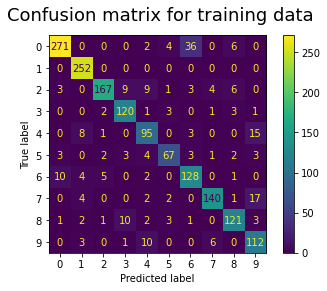

In [30]:
#plotting confusion matrix of Nearest mean classifier for training data

fig2, ax2 = plt.subplots()
#fig1.tight_layout(rect=[0, 0.03, 1, 0.95])

NMCconfmattrain = confusion_matrix(train_out, NMCTrainlabels)
ConfusionMatrixDisplay.from_predictions(train_out, NMCTrainlabels, ax = ax2)

#fig1.subplots_adjust(hspace=0.3, wspace=0.3)
fig2.suptitle('Confusion matrix for training data', size = 18)
fig2.show()

C:\Users\hkhan\AppData\Local\Temp\ipykernel_25928\2983152713.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig3.show()


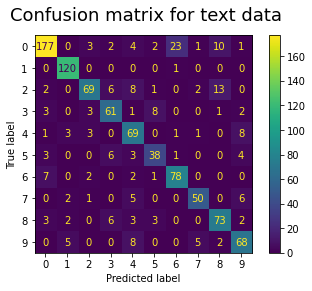

In [31]:
#plotting confusion matrix of Nearest mean classifier for test data

fig3, ax3 = plt.subplots()
#fig1.tight_layout(rect=[0, 0.03, 1, 0.95])

NMCconfmattest = confusion_matrix(test_out, NMCTestlabels)
ConfusionMatrixDisplay.from_predictions(test_out, NMCTestlabels, ax = ax3)

#fig1.subplots_adjust(hspace=0.3, wspace=0.3)
fig3.suptitle('Confusion matrix for text data', size = 18)
fig3.show()

## Part 4 - k-nearest neighbours classifier

In [20]:
#making the classifier and training it on the training data

knnclass = KNeighborsClassifier()
knnclass.fit(train_in, train_out)

KNeighborsClassifier()

In [26]:
#calculating knn classifier accuracy for train data

knnTrainlabels = knnclass.predict(train_in)
knnTrainaccuracy = 100*np.sum(knnTrainlabels  == train_out)/len(train_in)
print('Total accuracy (for training data) is ' + str(np.round(knnTrainaccuracy, 2)) + '%')

Total accuracy (for training data) is 96.6%


In [27]:
#calculating knn classifier digit-wise accuracy for train data

for idx9 in range(10):
    knndigTrainAcc = 100*np.sum(knnTrainlabels[train_out == idx9] == idx9)/np.sum(train_out == idx9)
    print('Accuracy for (for training data) digit ' + str(idx9) + ' is ' + str(np.round(knndigTrainAcc, 2)) + '%')

Accuracy for (for training data) digit 0 is 99.69%
Accuracy for (for training data) digit 1 is 100.0%
Accuracy for (for training data) digit 2 is 93.56%
Accuracy for (for training data) digit 3 is 97.71%
Accuracy for (for training data) digit 4 is 93.44%
Accuracy for (for training data) digit 5 is 90.91%
Accuracy for (for training data) digit 6 is 98.0%
Accuracy for (for training data) digit 7 is 97.59%
Accuracy for (for training data) digit 8 is 89.58%
Accuracy for (for training data) digit 9 is 97.73%


In [28]:
#calculating knn classifier accuracy for test data

knnTestlabels = knnclass.predict(test_in)
knnTestaccuracy = 100*np.sum(knnTestlabels  == test_out)/len(test_in)
print('Total accuracy (for test data) is ' + str(np.round(knnTestaccuracy, 2)) + '%')

Total accuracy (for test data) is 90.79%


In [29]:
#calculating knn classifier digit-wise accuracy for test data

for idx10 in range(10):
    knndigTestAcc = 100*np.sum(knnTestlabels[test_out == idx10] == idx10)/np.sum(test_out == idx10)
    print('Accuracy for (for test data) digit ' + str(idx10) + ' is ' + str(np.round(knndigTestAcc, 2)) + '%')

Accuracy for (for test data) digit 0 is 97.76%
Accuracy for (for test data) digit 1 is 98.35%
Accuracy for (for test data) digit 2 is 83.17%
Accuracy for (for test data) digit 3 is 88.61%
Accuracy for (for test data) digit 4 is 91.86%
Accuracy for (for test data) digit 5 is 63.64%
Accuracy for (for test data) digit 6 is 94.44%
Accuracy for (for test data) digit 7 is 87.5%
Accuracy for (for test data) digit 8 is 85.87%
Accuracy for (for test data) digit 9 is 93.18%


C:\Users\hkhan\AppData\Local\Temp\ipykernel_25928\527427124.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig4.show()


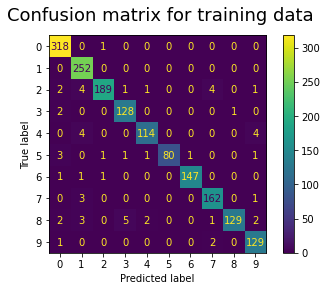

In [32]:
#plotting confusion matrix of knn classifier for training data

fig4, ax4 = plt.subplots()
#fig1.tight_layout(rect=[0, 0.03, 1, 0.95])

knnconfmattrain = confusion_matrix(train_out, knnTrainlabels)
ConfusionMatrixDisplay.from_predictions(train_out, knnTrainlabels, ax = ax4)

#fig1.subplots_adjust(hspace=0.3, wspace=0.3)
fig4.suptitle('Confusion matrix for training data', size = 18)
fig4.show()

C:\Users\hkhan\AppData\Local\Temp\ipykernel_25928\1869873390.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig5.show()


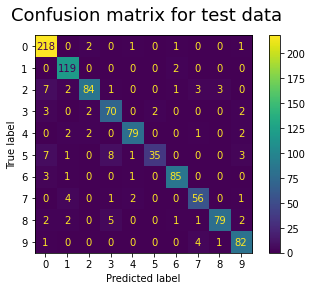

In [33]:
#plotting confusion matrix of knn classifier for test data

fig5, ax5 = plt.subplots()
#fig1.tight_layout(rect=[0, 0.03, 1, 0.95])

knnconfmattest = confusion_matrix(test_out, knnTestlabels)
ConfusionMatrixDisplay.from_predictions(test_out, knnTestlabels, ax = ax5)

#fig1.subplots_adjust(hspace=0.3, wspace=0.3)
fig5.suptitle('Confusion matrix for test data', size = 18)
fig5.show()